### _Here i will solve the exercise problems_

1. _What is the fundamental idea behind Support Vector Machines?_

- In classification, the fundamental idea is to fit the largest possible street between classes that separates those classes. The extreme datapoints and C (slack parameter) decides the marginal plane/line and decision boundary is at the center of street

- In Regression, the fundamental idea is to fit as many instances as possible in the street while limiting the margin violations


2. _What is a support vector?_


support vector is any instance located at either on the street or border of street (margin) after training. Decision boundary is entirely determined by support vectors, any instance other than support vector does not matter while training the SVM classifier/regressor

The predictions with kernelized SVM only include support vectors, not the whole dataset

3. _Why is it important to scale the inputs when using SVMs?_

Scaling centralizes the data which helps in determining best fit street. IF data is not centralized, each feature might have very different value which will not let the best street be determined
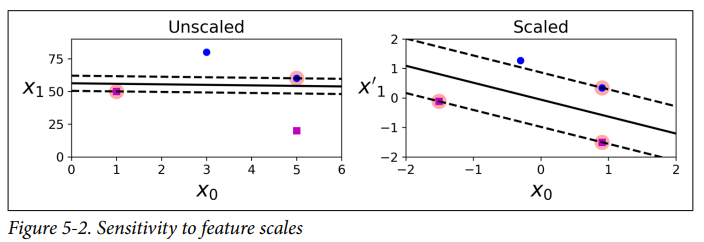

4. _Can an SVM classifier output a confidence score when it classifies an instance?
What about a probability?_

Yes!.  
We can use `decision_function` to get the confidence scores. (confidence score is the distance between instance predicted and decision boundary).

We can set `probability=True` during training SVC, under the hood it will train a LogisticRegression at the end of training and then `predict_proba` and `predict_log_proba` functions will be available

5. _Should you use the primal or the dual form of the SVM problem to train a model
on a training set with millions of instances and hundreds of features?_


The primal form of SVM is used when we have no. of instances > no. of features  
The dual form of SVM is used when we have no. of instances < no. of features

So we should use primal form of SVM here

6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit
the training set. Should you increase or decrease γ (gamma)? What about C?


Both gamma and C can be used to regularize the model. If the model is underfitting, we should increase gamma and C can also be increased

7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin
linear SVM classifier problem using an off-the-shelf QP solver?


Skip this question for now!!

8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [99]:
datasets.load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [120]:
# Load data
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

y.unique()

array([0, 1, 2])

In [122]:
# transforming it as binary classification
setosa_or_versicolor = (y == 0) | (y == 1)  # '|' is used for element-wise OR
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Since we need to get similar models, we will use same loss function and same hyperparameters. 
and get the weights and bias

In [124]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


linear_svc = LinearSVC(loss='hinge',C=100) # as data is easy separable i am making it hard margin
linear_svc.fit(X,y)

sgd_classifier = SGDClassifier(loss='hinge',alpha=0.01)  ## ran many values till i got similar results
sgd_classifier.fit(X,y)

svc = SVC(kernel='linear')
svc.fit(X,y)

SVC(kernel='linear')

In [125]:
linear_svc.coef_,linear_svc.intercept_

(array([[1.05365012, 1.09903913]]), array([0.28475022]))

In [126]:
sgd_classifier.coef_,sgd_classifier.intercept_

(array([[1.16724373, 1.16832683]]), array([0.26608342]))

In [127]:
svc.coef_,svc.intercept_

(array([[1.04342638, 0.94747825]]), array([0.32182521]))

Close enough!!

9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
may want to tune the hyperparameters using small validation sets to speed up the
process. What accuracy can you reach?



10. Train an SVM regressor on the California housing dataset.